In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import os
from b3d.utils import Bunch, get_shared
from b3d.io import (
    VideoInput,
    video_input_from_mp4, 
    plot_video_summary, 
    load_video_to_numpy, 
    load_video_info
)
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt


path = get_shared()/"dynamic_SfM/video_raw/pixel4a"
files = os.listdir(path)
print(f"Listing files from diretory...")
for i, f in enumerate(files):
    if f.endswith(".mp4"):
        print(f"{i} - \033[1m{f}\033[0m")
    else:
        print(f"{i} - {f}")

Listing files from diretory...
0 - intr_pixel4a.npy
1 - room_to_room_pixel4a.mp4
2 - intr_pixel4a_1080x1920.npy
3 - grab_box_2_pixel4a.mp4
4 - grab_box_1_pixel4a.mp4


In [41]:
video_fname = path/"grab_box_2_pixel4a.mp4"
intrinsics_fname = path/"intr_pixel4a_1080x1920.npy"
info = load_video_info(video_fname)
info


File: grab_box_2_pixel4a.mp4
- T: 298
- h: 1920
- w: 1080
- fps: 30

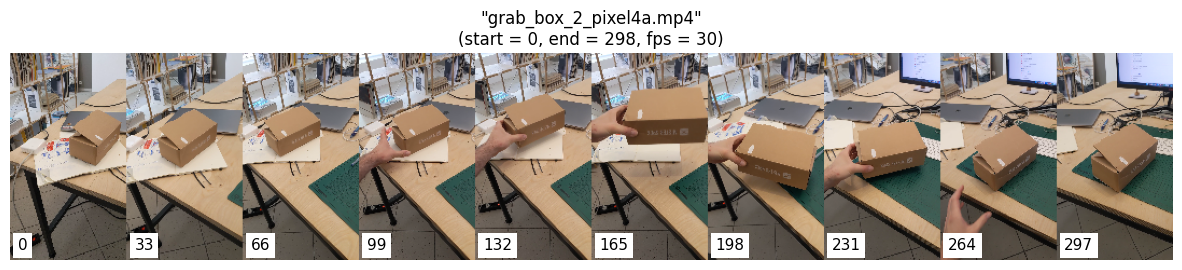

In [57]:
plot_video_summary(video_fname, start=0, end=info.T, reverse_color_channel=True)

In [55]:
times = np.arange(0, info.T, step=10) 
vi = video_input_from_mp4(video_fname, intrinsics_fname, times=times, downsize=1, reverse_color_channel=True)

vi_fname = path.parents[1]/"video_input"/f"{video_fname.stem}.VideoInput.npz"
vi.save(vi_fname)

print(vi_fname.name)

grab_box_2_pixel4a.VideoInput.npz


In [56]:
vi = VideoInput.load(vi_fname)
vi.fps

array(3.)